примеры взяты [отсюда](https://habr.com/ru/company/wunderfund/blog/316826/)

In [1]:
# list available python magics
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

### Используйте `%run` для выполнения кода на Python

%run может выполнить код на языке Python из файлов с расширением .py — это поведение хорошо задокументировано.

Но эта команда может выполнять и другие блокноты из Jupyter! Иногда это очень полезно.

Обратите внимание, что %run — это не то же, что импорт python-модуля.

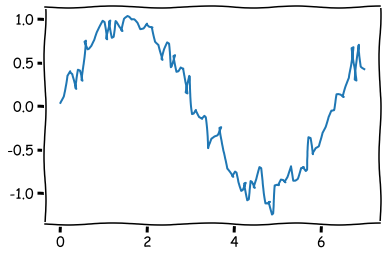

In [2]:
%run ./files/example.ipynb

### %load

Загрузит код напрямую в ячейку. Можно выбрать файл локально или из сети.

Если раскомментировать и выполнить код ниже, содержание ячейки заменится на содержание файла.

In [ ]:
# %load ./files/some.txt
42342
Now that!!!
sdfsdf


In [4]:
%%writefile ./files/some.txt

sdfsdf

Overwriting ./files/some.txt


### Тайминг

Если вы хотите замерить время выполнения программы или найти узкое место в коде, на помощь придет IPython.

In [5]:
%%time
import time
time.sleep(2) # sleep for two seconds

Wall time: 2 s


In [6]:
def some_foo(n):
    a = 0
    for i in range(int(n)):
        a += i
    return a

%timeit some_foo(1e6)

97.8 ms ± 6.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Профилирование: `%prun`

In [8]:
import numpy as np

def append_if_not_exists(arr, x):
    if x in arr:
        arr.append(x)

def some_useless_slow_function():
    arr = list()
    for i in range(10000):
        x = np.random.randint(0, 10000)
        append_if_not_exists(arr, x)

%prun some_useless_slow_function()

In [12]:
%timeit some_useless_slow_function()

52.6 ms ± 4.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
def some_useless_slow_function2():
    arr = list()
    xs = np.random.randint(0, 10000, size=10000)
    for x in xs:
        append_if_not_exists(arr, x)

In [14]:
%timeit some_useless_slow_function2()

4.01 ms ± 905 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%load_ext line_profiler

In [16]:
%lprun?

###### %lprun -f append_if_not_exists some_useless_slow_function2()